<a href="https://colab.research.google.com/github/NandhiniK-27/BIG-DATA-ERA-IN-GIS/blob/main/image_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import os
import shutil
import glob

In [ ]:
train_dir="./DATA"
org_dir = "/content/drive/MyDrive/train"
CLASS =['t']
cla = ['e']

In [ ]:
for C in CLASS:
  dest = os.path.join(train_dir,C)

  #if directory is not present then create one
  if not os.path.exists(dest):
    os.makedirs(dest)

In [ ]:
  for img_path in glob.glob(os.path.join(org_dir,C)+"*"):
    src=img_path

    shutil.copy(src,dest)

In [ ]:
for D in cla:
  dest1 = os.path.join(train_dir,D)

  #if directory is not present then create one
  if not os.path.exists(dest1):
    os.makedirs(dest1)

In [ ]:
for img_path in glob.glob(os.path.join(org_dir,D)+"*"):
    src=img_path

    shutil.copy(src,dest1)

In [ ]:
os.listdir("/content/drive/MyDrive/train")

['e1.jpg',
 't1.jpg',
 'e2.jpg',
 't2.jpg',
 'e3.jpg',
 't3.jpg',
 't4.jpg',
 'e4.jpg',
 't5.jpg',
 'e5.jpg',
 'e6.jpg',
 't6.jpg',
 'e7.jpg',
 't7.jpg',
 'e8.jpg',
 't8.jpg',
 'e9.jpg',
 't9.jpg',
 'e10.jpg',
 't10.jpg',
 'e11.jpg',
 't11.jpg',
 't12.jpg',
 'e12.jpg',
 't13.jpg',
 'e13.jpg',
 't14.jpg',
 'e14.jpg',
 't15.jpg',
 'e15.jpg',
 'e16.jpg',
 't16.jpg',
 't17.jpg',
 'e17.jpg',
 'e18.jpg',
 't18.jpg',
 't19.jpg',
 'e19.jpg',
 'e20.jpg',
 't20.jpg']

In [ ]:
#model building

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3),include_top = False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2,activation='sigmoid')(X)

In [ ]:
#final model
model = Model(base_model.input,X)

#compile the model
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy, metrics=['accuracy'])


In [ ]:
#summary

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#pre-process data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
    featurewise_center= True,
    rotation_range=0.4,
    width_shift_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    zoom_range=0.4,
    shear_range=0.4)

In [ ]:
train_data = train_datagen.flow_from_directory(directory="/content/DATA",
                                               target_size=(256,256),
                                               batch_size = 20)

Found 40 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'e': 0, 't': 1}

visualizing the data

In [ ]:
t_img,label=train_data.next()

In [ ]:
t_img.shape

(20, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  """
  input:image array
  output:plot images
  """
  for idx,img in enumerate(img_arr):
    if idx<=10:

      plt.figure(figsize=(4,4))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

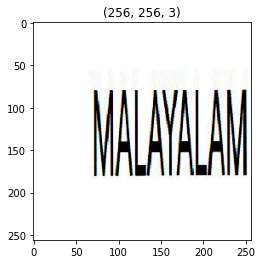

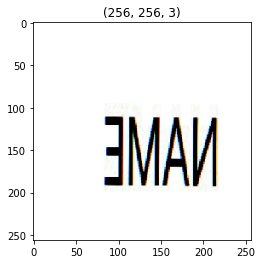

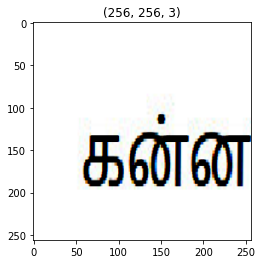

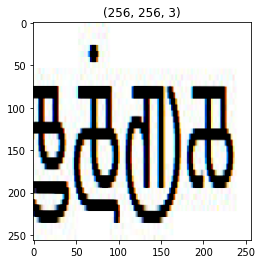

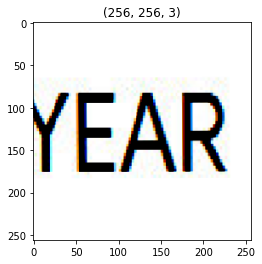

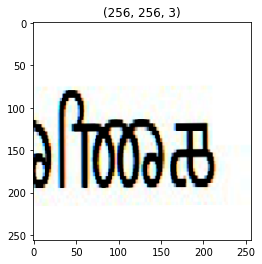

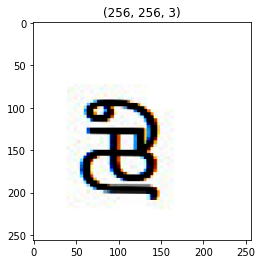

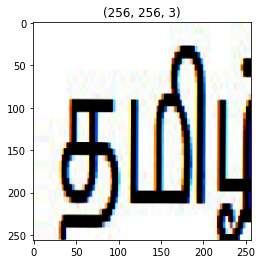

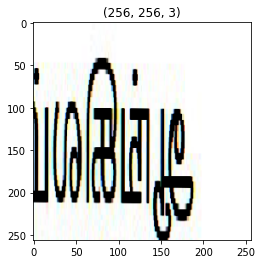

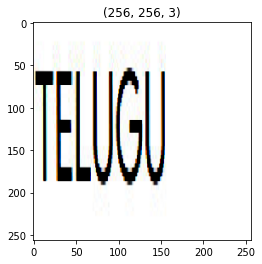

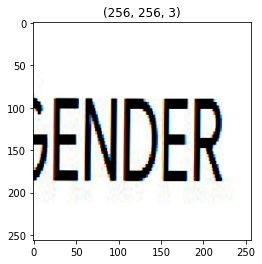

In [ ]:
 plotImage(t_img,label)

Model check point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]

In [ ]:
his=model.fit_generator(train_data,
                        steps_per_epoch=5,
                        epochs=20,
                        callbacks=cb)

Epoch 1/20
2/5 [===========>..................] - ETA: 0s - loss: 0.0699 - accuracy: 0.9750


Epoch 1: accuracy did not improve from 0.97500
5/5 [==============================] - 3s 82ms/step - loss: 0.0699 - accuracy: 0.9750


In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
#validate out model

In [ ]:
from keras.preprocessing import image

In [ ]:
#path for the image to see if it predicts correct class

path = "/content/drive/MyDrive/test/t2.jpg"
img = image.load_img(path,target_size=(256,256))

i = image.img_to_array(img)/256
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

In [ ]:
print(pred)

1


In [ ]:
#path for the image to see if it predicts correct class

path = "/content/drive/MyDrive/test/e4.jpg"
img = load_img(path,target_size=(256,256))

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


In [ ]:
print(pred)

0


the image is english


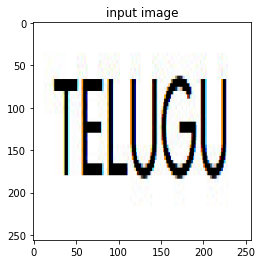

In [ ]:

if pred == 0:
  print("the image is english")

else:
  print("the image is tamil")

# to display the image

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis=False
plt.show()
